In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1],color ='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [14]:
data_X, class_label = make_classification(n_samples=1000,n_classes=2,weights=[1,1], random_state=1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [16]:
model = KNeighborsClassifier()
model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
probs = model.predict_proba(testX)
probs = probs[:,1]
roc = roc_curve(testy, probs)
print('Roc : {}'.format(roc))
auc = roc_auc_score(testy, probs)
print('AUC : ', auc)


Roc : (array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC :  0.9129746835443038


In [18]:
fpr, tpr, thresholds = roc_curve(testy, probs)

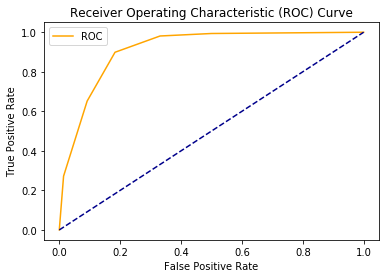

In [19]:
plot_roc_curve(fpr, tpr)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
KNN = KNeighborsClassifier()
scores = cross_val_score(KNN, iris.data, iris.target)
print('교차검증점수', scores)

교차검증점수 [0.98039216 0.98039216 1.        ]


c:\users\fire7\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
scores = cross_val_score(KNN, iris.data, iris.target, cv=5)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [26]:
print('교차 검증 점수 평균', round(scores.mean(),3))

교차 검증 점수 평균 0.973


In [27]:
from sklearn.model_selection import LeaveOneOut

In [30]:
loo=LeaveOneOut()
scores = cross_val_score(logreg,iris.data,iris.target,cv=loo)
print('교차검증분할횟수: ', len(scores))
print('평균 정확도: ', round(scores.mean(),3))

NameError: name 'logreg' is not defined